# Project Statistical Analysis

### Ironhack Data Analytics week 05 individual project

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('../data/train.csv')
#importing data 

#### Inspecting dataset

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
train.shape

(1460, 81)

In [8]:
# creating df with absolute number and percentage of missing values per column
# sorting by ascending to show the ones with most missing values on top

train_null = train.isna().sum().sort_values( ascending = False)

train_perc_null = (train.isna().sum() / train.isna().count()).sort_values(ascending = False)

no_data = pd.concat([train_null, train_perc_null], axis = 1)
no_data.head(20)

,0,1
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


It looks like the columns with a lot of missing values represent specific features which probably don't apply for every house. From my knowledge I would assume that features like a pool or fireplace probably are only found in more expensive houses, which could be considered potential outliers and are not that important.  To reduce amount of null values in the dataframe I decide to drop these columns.

In [9]:
train = train.drop(['PoolQC', 'MiscFeature', 'Alley',
                    'Fence', 'FireplaceQu'], axis = 1)


In [10]:
train.columns  

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [11]:
# inspecting dtypes for potential columns of interest
train[[ 'LotArea' , 'GrLivArea', 'Neighborhood',
       'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
      'MoSold', 'YrSold', 'SalePrice', 'BedroomAbvGr',
       'FullBath','HalfBath', 'GarageArea', 'GarageCars', 'Functional']].dtypes

LotArea          int64
GrLivArea        int64
Neighborhood    object
YearBuilt        int64
YearRemodAdd     int64
TotalBsmtSF      int64
MoSold           int64
YrSold           int64
SalePrice        int64
BedroomAbvGr     int64
FullBath         int64
HalfBath         int64
GarageArea       int64
GarageCars       int64
Functional      object
dtype: object

#### Looking at the Sales Price in general

In [12]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

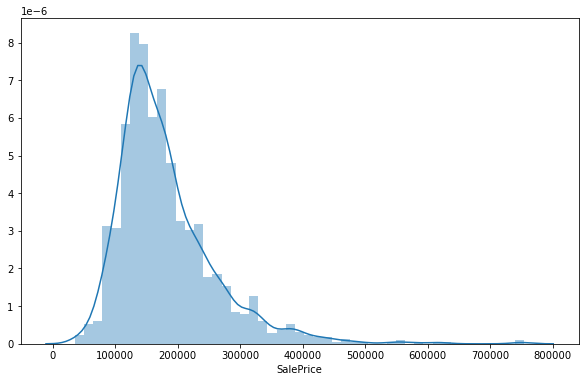

In [13]:
fig, ax = plt.subplots (figsize = (10, 6))

sns.distplot(train['SalePrice'])
# using a distribution plot to see weather the data is skewed or not

In [14]:
# if outliers are removed, 
# the distribution will be almost a normal distribution,
# we would need a normal distribution for hypothesis testing


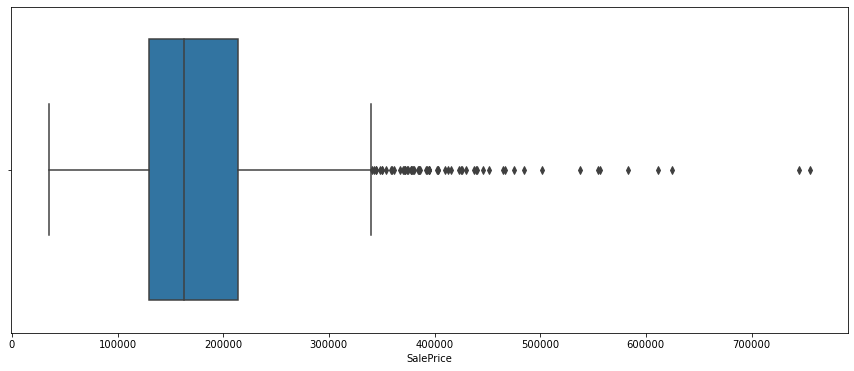

In [15]:
fig, ax = plt.subplots (figsize = (15, 6))
sns.boxplot(train['SalePrice'])

#### From my general understanding of real estate (without any domain knowledge) I assume that the size of a house has a big impact on the sales price. In the dataset are two columns with related data, the Ground Living Area and Total Basement Squarefeet. 

#### What does Ground Living Area look like?

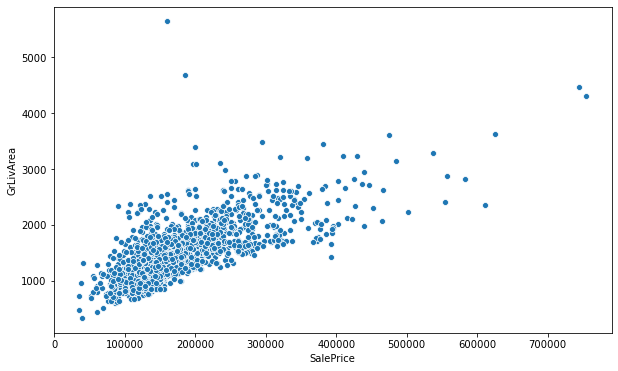

In [16]:
fig, ax = plt.subplots (figsize = (10, 6))

sns.scatterplot( train['SalePrice'], train['GrLivArea'] )

In [17]:
train['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [18]:
#correlation coeff
np.corrcoef(train['SalePrice'], train['GrLivArea'])[0, 1]

0.7086244776126522

In [19]:
#adding a constant to the dataframe, this is necessary to build a linear regression model

train = sm.add_constant(train)

In [20]:
#building a model with column Ground Living Area
model = sm.OLS(train['SalePrice'], train[['GrLivArea', 'const']] )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          4.52e-223
Time:                        17:28:05   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Conclusion model: The model with Ground Living Area as the independent variable  explains about 50% of Sales Prices. This is statistically significant since there is a t-statistic of 38.348 (threshold is 1.96). 

In [21]:
# predict values with linear regression model 
train = train.assign(pred_price1 = results.predict(train[['GrLivArea', 'const']]))

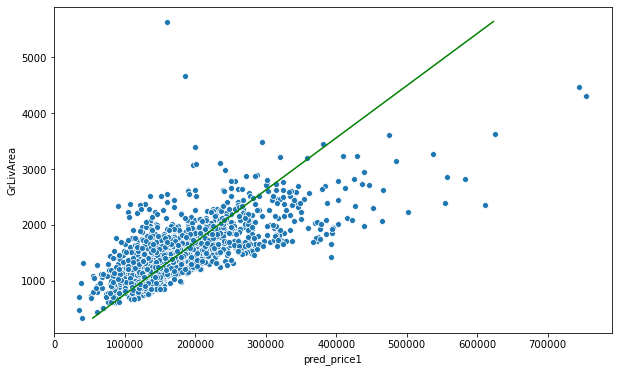

In [22]:
# visualizing the regression line with a scatterplot of sales price 
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot( train['SalePrice'], train['GrLivArea'] )
sns.lineplot( train['pred_price1'], train['GrLivArea'], color = 'green')

#### Adding basement squarefeet to the model

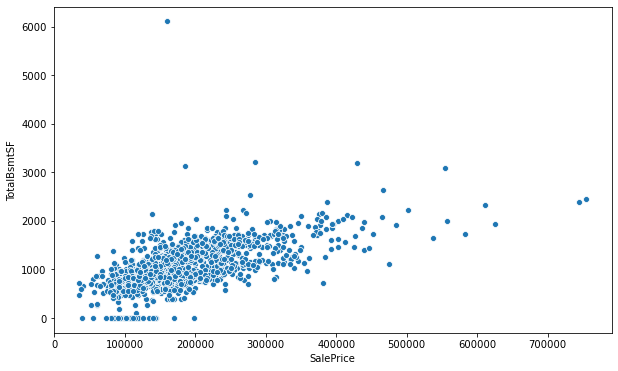

In [23]:
#visualizing sales price and total basement squarefeet
fig, ax = plt.subplots (figsize = (10, 6))

sns.scatterplot(train['SalePrice'], train['TotalBsmtSF'])

In [24]:
train['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [25]:
#adding the column to the model
model = sm.OLS(train['SalePrice'], train[['GrLivArea','TotalBsmtSF', 'const']])

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1135.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          6.54e-298
Time:                        17:28:11   Log-Likelihood:                -17858.
No. Observations:                1460   AIC:                         3.572e+04
Df Residuals:                    1457   BIC:                         3.574e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GrLivArea      81.8768      2.781     29.446      0.000      76.422      87.331
TotalBsmtSF    66.4998      3.331     19.967      0.000      59.967      73.033
const       -1.348e+04   4283.806     -3.147      0.002   -2.19e+04   -5075.919
==============================================================================
Omnibus:                      775.485   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59606.707
Skew:                          -1.605   Prob(JB):                         0.00
Kurtosis:                      34.137   Cond. No.                     6.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Conclusion: Adding the Total Basement Squarefeet to the model increases the Adjusted R-squared to 0.609 which means that the model explains already 60% of all the sales prices. With a t-statistic of 19.967 this is statistical significant.

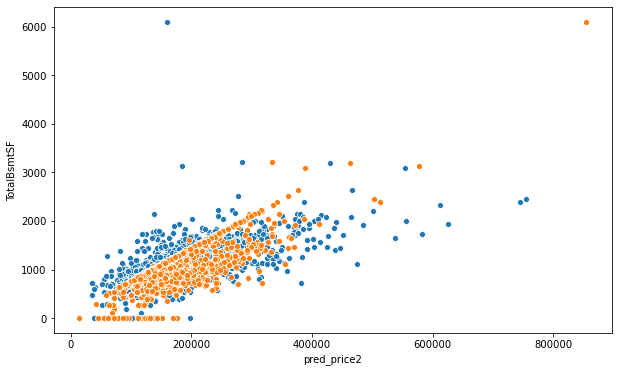

In [26]:
#trying to visualize the predicted sales price next to the original sales price
train = train.assign(pred_price2 = result.predict(train[['GrLivArea','TotalBsmtSF', 'const']]))

fig, ax = plt.subplots(figsize = (10,6 ))

sns.scatterplot(train['SalePrice'], train['TotalBsmtSF'])
sns.scatterplot(train['pred_price2'], train['TotalBsmtSF'])

The scatterplot shows the prices from the dataset in blue and the predicted prices with the model in orange. It visualizes the 60% fit of the model. 

Since the size of the living area of the houses are having a big impact on the sales price, I assume that the Lot Area could have an impact as well. 

#### Adding Lot Area to the model

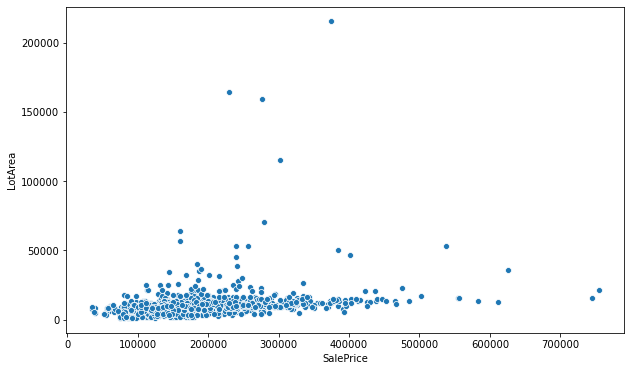

In [27]:
fig, ax = plt.subplots (figsize = (10, 6))

sns.scatterplot(train['SalePrice'], train['LotArea'])

It seems as most of the lots have the same size. Let's see how it impacts the model anyway.

In [28]:
model = sm.OLS(train['SalePrice'], train[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'const']])

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     758.6
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          6.49e-297
Time:                        17:28:11   Log-Likelihood:                -17857.
No. Observations:                1460   AIC:                         3.572e+04
Df Residuals:                    1456   BIC:                         3.574e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
LotArea         0.2246      0.137      1.641      0.101      -0.044       0.493
GrLivArea      81.0996      2.819     28.768      0.000      75.570      86.629
TotalBsmtSF    65.5903      3.374     19.437      0.000      58.971      72.210
const        -1.37e+04   4283.473     -3.199      0.001   -2.21e+04   -5299.265
==============================================================================
Omnibus:                      789.062   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62830.278
Skew:                          -1.642   Prob(JB):                         0.00
Kurtosis:                      34.969   Cond. No.                     4.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Adding the lot area to the model doesn't increase the adjusted R-squared. The model still represents 60% of the prices. Since the t-statistic is 1.9 (threshold is 1.96) the lot area will not stay in the model. 

Next to the general size of the house and the lot, I thank that the number of bedrooms really influences the price. 

#### Adding the number of bedrooms above ground to the model

In [29]:
model = sm.OLS(train['SalePrice'], train[['BedroomAbvGr', 'GrLivArea', 'TotalBsmtSF', 'const']])
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     843.6
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          7.97e-318
Time:                        17:28:11   Log-Likelihood:                -17809.
No. Observations:                1460   AIC:                         3.563e+04
Df Residuals:                    1456   BIC:                         3.565e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
BedroomAbvGr -1.887e+04   1864.332    -10.123      0.000   -2.25e+04   -1.52e+04
GrLivArea      100.2857      3.246     30.897      0.000      93.919     106.653
TotalBsmtSF     58.2404      3.322     17.531      0.000      51.724      64.757
const         2.145e+04   5391.143      3.979      0.000    1.09e+04     3.2e+04
==============================================================================
Omnibus:                     1002.270   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109185.667
Skew:                          -2.335   Prob(JB):                         0.00
Kurtosis:                      45.107   Cond. No.                     8.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### With the number of bedrooms above ground added to the model the adjusted R-squared is now at 0.634 which means that the model represents 63.4% of the sales prices. With a t-statistic of 10.123 this is considered statistically significant. 

Since the number of bedrooms had an effect on the price, I assume that also the number of bathrooms is important. 

#### Adding the number of full bathrooms to the model

In [30]:
model = sm.OLS(train['SalePrice'], train[['FullBath', 'BedroomAbvGr', 'GrLivArea', 'TotalBsmtSF', 'const']])

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     689.6
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:28:11   Log-Likelihood:                -17768.
No. Observations:                1460   AIC:                         3.555e+04
Df Residuals:                    1455   BIC:                         3.557e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
FullBath      2.627e+04   2871.435      9.147      0.000    2.06e+04    3.19e+04
BedroomAbvGr     -2e+04   1817.758    -11.004      0.000   -2.36e+04   -1.64e+04
GrLivArea       84.6258      3.592     23.562      0.000      77.580      91.671
TotalBsmtSF     56.2009      3.239     17.350      0.000      49.847      62.555
const         9472.9057   5405.389      1.752      0.080   -1130.282    2.01e+04
==============================================================================
Omnibus:                      849.354   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72419.365
Skew:                          -1.835   Prob(JB):                         0.00
Kurtosis:                      37.307   Cond. No.                     8.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Conclusion: The number of full bathrooms also has an impact on the model, since adding it raises the adjusted R-squared to 0.654 . The model now explains 65,4% of all sales prices. The t-statistic of 9.147 proves that this has statistical significance. 

I have the feeling that having a guest bathroom or additional smaller bathrooms adds to the value of the price as well. 

#### Adding half bathrooms to the model

In [31]:
model = sm.OLS(train['SalePrice'], train[['HalfBath','FullBath', 'BedroomAbvGr',
                                         'GrLivArea', 'TotalBsmtSF', 'const' ]])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     578.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:28:11   Log-Likelihood:                -17745.
No. Observations:                1460   AIC:                         3.550e+04
Df Residuals:                    1454   BIC:                         3.553e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
HalfBath      1.904e+04   2801.588      6.798      0.000    1.35e+04    2.45e+04
FullBath       2.95e+04   2867.670     10.288      0.000    2.39e+04    3.51e+04
BedroomAbvGr -1.935e+04   1792.720    -10.794      0.000   -2.29e+04   -1.58e+04
GrLivArea       71.8600      4.005     17.944      0.000      64.004      79.716
TotalBsmtSF     62.8444      3.336     18.836      0.000      56.300      69.389
const         7568.9434   5330.685      1.420      0.156   -2887.711     1.8e+04
==============================================================================
Omnibus:                      827.686   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75370.399
Skew:                          -1.739   Prob(JB):                         0.00
Kurtosis:                      38.027   Cond. No.                     8.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Conclusion: Adding the half bathroom category to the model increases the adjusted R-squared to 0.664 which means the model now explains 66.4% of all sales prices. This is statitically significant with a t-statistic of 6.798

I know that having a car in the U.S. is pretty important, especially if you don't live in a big city with good public transportation. Assuming that most houses have a garage I think it is important to look on the impact on the sales price. Therefore I assume that the size of the garage also impacts the sales prices. 

#### Adding garage size to the model

In [32]:
model = sm.OLS(train['SalePrice'], train[['GarageArea','HalfBath','FullBath', 'BedroomAbvGr',
                                         'GrLivArea', 'TotalBsmtSF', 'const' ]])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     556.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:28:11   Log-Likelihood:                -17673.
No. Observations:                1460   AIC:                         3.536e+04
Df Residuals:                    1453   BIC:                         3.540e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
GarageArea      81.9862      6.696     12.244      0.000      68.851      95.121
HalfBath      1.608e+04   2679.270      6.000      0.000    1.08e+04    2.13e+04
FullBath      2.343e+04   2775.849      8.442      0.000     1.8e+04    2.89e+04
BedroomAbvGr -1.561e+04   1734.604     -8.997      0.000    -1.9e+04   -1.22e+04
GrLivArea       63.2333      3.879     16.303      0.000      55.625      70.842
TotalBsmtSF     50.0494      3.345     14.962      0.000      43.488      56.611
const        -4705.2583   5175.065     -0.909      0.363   -1.49e+04    5446.139
==============================================================================
Omnibus:                      803.730   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82111.943
Skew:                          -1.622   Prob(JB):                         0.00
Kurtosis:                      39.596   Cond. No.                     9.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Conclusion: after adding the garage area to the model the adjusted R-squared is increased to 0.695 which means the model explains 69.5% of the sales prices. 

#### Adding Garage Cars column to the model which shows how many cars could fit into the garage

In [33]:
model = sm.OLS(train['SalePrice'], train[[ 'GarageCars' ,'GarageArea',
                                          'HalfBath','FullBath', 'BedroomAbvGr',
                                         'GrLivArea', 'TotalBsmtSF', 'const']])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     500.2
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:28:11   Log-Likelihood:                -17648.
No. Observations:                1460   AIC:                         3.531e+04
Df Residuals:                    1452   BIC:                         3.535e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
GarageCars    2.408e+04   3377.318      7.131      0.000    1.75e+04    3.07e+04
GarageArea      12.6923     11.738      1.081      0.280     -10.332      35.717
HalfBath      1.289e+04   2672.018      4.825      0.000    7651.155    1.81e+04
FullBath      1.823e+04   2825.273      6.452      0.000    1.27e+04    2.38e+04
BedroomAbvGr -1.517e+04   1706.677     -8.890      0.000   -1.85e+04   -1.18e+04
GrLivArea       64.9741      3.822     17.001      0.000      57.478      72.471
TotalBsmtSF     49.6029      3.290     15.078      0.000      43.150      56.056
const        -8538.3724   5116.816     -1.669      0.095   -1.86e+04    1498.769
==============================================================================
Omnibus:                      654.092   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50996.735
Skew:                          -1.191   Prob(JB):                         0.00
Kurtosis:                      31.855   Cond. No.                     9.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Conclusion: Added the column actually increased the adjusted R-squared but it also decreased the t-statistic of garage area which means that the two are interacting. The two columns represent pretty much the same thing. The column will be excluded from the model. 

My next thought is that the age of the house would affect the price. 

#### Adding Year Build to the model 

In [34]:
model = sm.OLS(train['SalePrice'], train[['YearBuilt', 'GarageArea',
                                          'HalfBath','FullBath', 'BedroomAbvGr',
                                         'GrLivArea', 'TotalBsmtSF', 'const']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     545.3
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:28:11   Log-Likelihood:                -17603.
No. Observations:                1460   AIC:                         3.522e+04
Df Residuals:                    1452   BIC:                         3.526e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
YearBuilt      643.4907     53.161     12.105      0.000     539.211     747.771
GarageArea      56.5609      6.721      8.416      0.000      43.378      69.744
HalfBath       855.1305   2847.143      0.300      0.764   -4729.823    6440.084
FullBath      2804.3160   3147.740      0.891      0.373   -3370.288    8978.920
BedroomAbvGr -1.286e+04   1669.211     -7.706      0.000   -1.61e+04   -9589.127
GrLivArea       84.0203      4.077     20.607      0.000      76.022      92.018
TotalBsmtSF     34.6896      3.432     10.107      0.000      27.957      41.423
const        -1.246e+06   1.03e+05    -12.136      0.000   -1.45e+06   -1.04e+06
==============================================================================
Omnibus:                      832.130   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110450.797
Skew:                          -1.648   Prob(JB):                         0.00
Kurtosis:                      45.483   Cond. No.                     2.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Conclusion: By adding the Year Built to the model the adjusted R-squared increases to 0.723 but it also lowers the t-statistic of the full bathroom and half bathroom column to values beneath statistical significance. The bathroom columns will be excluded from the model

Maybe the year of the sale also influences the price.

#### Adding Year Sold to the model

In [35]:
model = sm.OLS(train['SalePrice'], train[['YrSold', 'YearBuilt', 'GarageArea','BedroomAbvGr',
                                         'GrLivArea', 'TotalBsmtSF', 'const']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     636.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:28:12   Log-Likelihood:                -17604.
No. Observations:                1460   AIC:                         3.522e+04
Df Residuals:                    1453   BIC:                         3.526e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
YrSold        -142.8237    824.854     -0.173      0.863   -1760.856    1475.208
YearBuilt      668.6106     42.538     15.718      0.000     585.167     752.054
GarageArea      56.3988      6.708      8.407      0.000      43.240      69.558
BedroomAbvGr -1.265e+04   1650.763     -7.663      0.000   -1.59e+04   -9412.206
GrLivArea       86.0229      3.020     28.487      0.000      80.099      91.946
TotalBsmtSF     34.0257      3.106     10.956      0.000      27.934      40.118
const        -1.007e+06   1.66e+06     -0.607      0.544   -4.26e+06    2.25e+06
==============================================================================
Omnibus:                      847.247   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115022.613
Skew:                          -1.695   Prob(JB):                         0.00
Kurtosis:                      46.351   Cond. No.                     5.18e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Conclusion: The t-statistic is below 1.96 which means that the data from the column doesn't have a statistically significant impact on the model. 

#### Preparing dummy variables for column House Style

In [36]:
train['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [37]:
train = train.assign( dummy_HS = np.where(train['HouseStyle'] == '1Story' , 1 , 
                                 np.where(train['HouseStyle'] == '2Story' , 2 ,
                                         np.where(train['HouseStyle'] == '1.5Fin' , 3 ,
                                                 np.where(train['HouseStyle'] == 'SLv1' , 4 ,
                                                         np.where(train['HouseStyle'] == 'SFoyer' , 5 ,
                                                                 np.where(train['HouseStyle'] == '1.5Unf' , 6 ,
                                                                         np.where(train['HouseStyle'] ==
                                                                                  '2.5Unf', 7 , 8))))))))

#### Adding House Style to the model

In [38]:
model = sm.OLS(train['SalePrice'], train[[ 'dummy_HS', 'YearBuilt', 'GarageArea',
                                          'BedroomAbvGr','GrLivArea', 'TotalBsmtSF', 'const']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     636.2
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:28:12   Log-Likelihood:                -17603.
No. Observations:                1460   AIC:                         3.522e+04
Df Residuals:                    1453   BIC:                         3.526e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
dummy_HS      -233.4739    670.454     -0.348      0.728   -1548.636    1081.688
YearBuilt      666.9737     42.807     15.581      0.000     583.004     750.943
GarageArea      56.4367      6.708      8.414      0.000      43.279      69.595
BedroomAbvGr -1.265e+04   1650.301     -7.663      0.000   -1.59e+04   -9409.602
GrLivArea       86.1993      3.059     28.176      0.000      80.198      92.201
TotalBsmtSF     33.7610      3.196     10.564      0.000      27.492      40.030
const         -1.29e+06   8.34e+04    -15.463      0.000   -1.45e+06   -1.13e+06
==============================================================================
Omnibus:                      845.281   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           114313.040
Skew:                          -1.689   Prob(JB):                         0.00
Kurtosis:                      46.217   Cond. No.                     2.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Conclusion: The t-statistic is too low, which means the data doesn't add a statistically significant value to the model.

####  Adding Overall Quality instead 

In [39]:
train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [40]:
model = sm.OLS(train['SalePrice'], train[[ 'OverallQual', 'YearBuilt', 'GarageArea',
                                          'BedroomAbvGr','GrLivArea', 'TotalBsmtSF', 'const']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     815.4
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:28:12   Log-Likelihood:                -17468.
No. Observations:                1460   AIC:                         3.495e+04
Df Residuals:                    1453   BIC:                         3.499e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   1.992e+04   1156.190     17.226      0.000    1.76e+04    2.22e+04
YearBuilt      336.3666     43.298      7.769      0.000     251.433     421.300
GarageArea      42.7113      6.164      6.929      0.000      30.620      54.803
BedroomAbvGr -7986.6258   1528.024     -5.227      0.000    -1.1e+04   -4989.258
GrLivArea       60.7059      3.120     19.459      0.000      54.586      66.826
TotalBsmtSF     25.8225      2.870      8.998      0.000      20.193      31.452
const        -7.202e+05   8.24e+04     -8.739      0.000   -8.82e+05   -5.59e+05
==============================================================================
Omnibus:                      648.052   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84704.867
Skew:                          -1.027   Prob(JB):                         0.00
Kurtosis:                      40.258   Cond. No.                     2.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Conclusion: This improves the model to an adjusted R-squared of 0.77 which means that it represents 77% of all Sales prices in the dataset. Overall Quality has a t-statistic of 17.226 and is therefore statistically significant.

#### Adding Overall Condition to the model

In [41]:
model = sm.OLS(train['SalePrice'], train[['OverallCond', 'OverallQual', 'YearBuilt', 'GarageArea',
                                          'BedroomAbvGr','GrLivArea', 'TotalBsmtSF', 'const' ]])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     728.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:28:12   Log-Likelihood:                -17444.
No. Observations:                1460   AIC:                         3.490e+04
Df Residuals:                    1452   BIC:                         3.495e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallCond   6732.5133    976.428      6.895      0.000    4817.153    8647.874
OverallQual   1.819e+04   1165.257     15.612      0.000    1.59e+04    2.05e+04
YearBuilt      460.9185     46.291      9.957      0.000     370.114     551.723
GarageArea      41.8846      6.069      6.902      0.000      29.980      53.789
BedroomAbvGr -8247.4475   1504.600     -5.481      0.000   -1.12e+04   -5296.026
GrLivArea       62.9031      3.087     20.374      0.000      56.847      68.959
TotalBsmtSF     27.3346      2.833      9.647      0.000      21.777      32.893
const        -9.966e+05   9.05e+04    -11.014      0.000   -1.17e+06   -8.19e+05
==============================================================================
Omnibus:                      701.549   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107704.297
Skew:                          -1.163   Prob(JB):                         0.00
Kurtosis:                      45.013   Cond. No.                     2.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Conclusion: The model has an adjusted R-squared of 0.777 and explains 77.7% of all Sales Prices from the dataset. With a t-statistic of 6.895 the correlation of the data is statistically significant. 

#### Adding Building Type to the model

'BldgType', 'Neighborhood','Functional'

In [44]:
train['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [46]:
train = train.assign( dummy_BT = np.where(train['BldgType'] == '1Fam' , 1 ,
                                  np.where(train['BldgType'] == 'TwnhsE' , 2 ,
                                          np.where(train['BldgType'] == 'Duplex' , 3 ,
                                                  np.where(train['BldgType'] == 'Twnhs' , 4 , 5)))))
train['dummy_BT'].value_counts()

1    1220
2     114
3      52
4      43
5      31
Name: dummy_BT, dtype: int64

In [47]:
model = sm.OLS(train['SalePrice'], train[['dummy_BT','OverallCond', 'OverallQual', 'YearBuilt', 'GarageArea',
                                          'BedroomAbvGr','GrLivArea', 'TotalBsmtSF', 'const' ]])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     653.8
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:34:22   Log-Likelihood:                -17429.
No. Observations:                1460   AIC:                         3.488e+04
Df Residuals:                    1451   BIC:                         3.492e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
dummy_BT     -6449.0138   1169.596     -5.514      0.000   -8743.293   -4154.735
OverallCond   6245.0435    970.724      6.433      0.000    4340.872    8149.215
OverallQual   1.783e+04   1155.515     15.429      0.000    1.56e+04    2.01e+04
YearBuilt      473.0100     45.882     10.309      0.000     383.008     563.012
GarageArea      38.8033      6.034      6.430      0.000      26.966      50.640
BedroomAbvGr -8668.9325   1491.553     -5.812      0.000   -1.16e+04   -5743.102
GrLivArea       64.0202      3.063     20.899      0.000      58.011      70.029
TotalBsmtSF     25.9435      2.816      9.211      0.000      20.419      31.468
const        -1.004e+06   8.96e+04    -11.212      0.000   -1.18e+06   -8.29e+05
==============================================================================
Omnibus:                      699.090   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112326.639
Skew:                          -1.143   Prob(JB):                         0.00
Kurtosis:                      45.910   Cond. No.                     2.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Conclusion: Adding the building type to the model improves it to an adjusted R-squared of 0.782 and represents a total of 78.2% of all sales prices in the dataset. 